In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider

# Generate a signal with known frequencies
time = np.linspace(0, 1, 1000)
freq1 = 5  # Frequency of the first sine wave component
freq2 = 20  # Frequency of the second sine wave component
signal = np.sin(2 * np.pi * freq1 * time) + np.sin(2 * np.pi * freq2 * time)

# Add noise to the signal
noise = np.random.normal(0, 0.5, size=len(signal))
noisy_signal = signal + noise

# Define the denoising function
def wavelet_denoise(threshold, wavelet, level):
    # Perform wavelet denoising
    coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)
    coeffs[1:] = (pywt.threshold(c, threshold) for c in coeffs[1:])
    denoised_signal = pywt.waverec(coeffs, wavelet)
    
    # Plotting the original, noisy, and denoised signals
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(time, signal, 'b-', label='Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original Signal')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(time, noisy_signal, 'g-', label='Noisy Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Noisy Signal')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(time, denoised_signal, 'r-', label='Denoised Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Denoised Signal')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Set up interactive controls
threshold_slider = FloatSlider(min=0, max=2, step=0.01, value=1, description='Threshold')
wavelet_dropdown = Dropdown(options=['db4', 'haar', 'sym4'], value='db4', description='Wavelet')
level_slider = IntSlider(min=1, max=5, value=3, description='Level')

# Define the interactive function
def update_denoised_signal(threshold, wavelet, level):
    wavelet_denoise(threshold, wavelet, level)

# Display the interactive controls and plot
interact(update_denoised_signal, threshold=threshold_slider, wavelet=wavelet_dropdown, level=level_slider)


interactive(children=(FloatSlider(value=1.0, description='Threshold', max=2.0, step=0.01), Dropdown(descriptio…

<function __main__.update_denoised_signal(threshold, wavelet, level)>

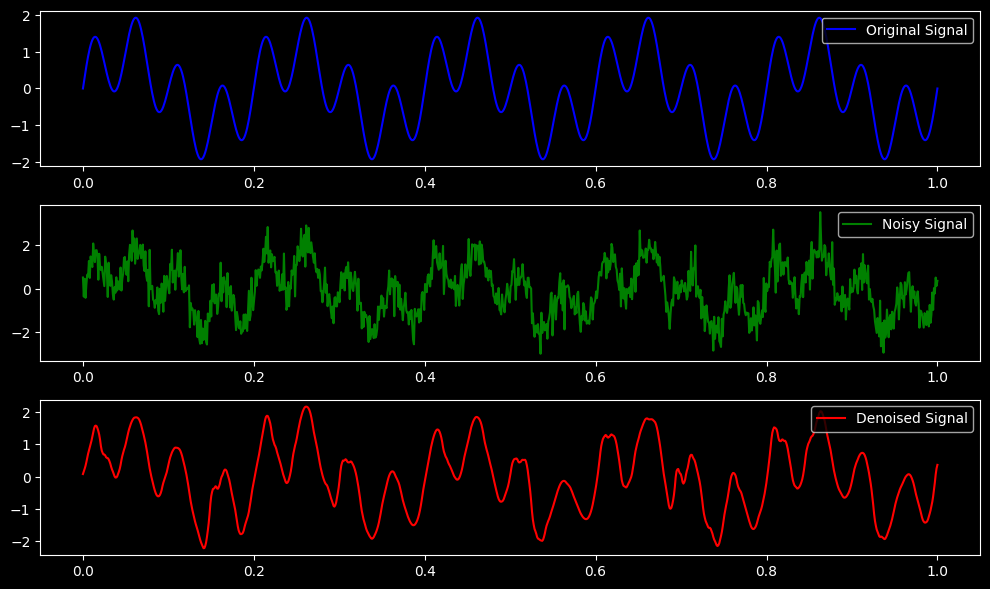

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate a signal with known frequencies
time = np.linspace(0, 1, 1000)
freq1 = 5  # Frequency of the first sine wave component
freq2 = 20  # Frequency of the second sine wave component
signal = np.sin(2 * np.pi * freq1 * time) + np.sin(2 * np.pi * freq2 * time)

# Add noise to the signal
noise = np.random.normal(0, 0.5, size=len(signal))
noisy_signal = signal + noise

# Perform wavelet denoising
wavelet = 'db4'  # Choose the wavelet type (e.g., Daubechies 4)
level = 3  # Choose the decomposition level
coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)
threshold = np.std(coeffs[-level]) * np.sqrt(2 * np.log(len(signal)))
coeffs[1:] = (pywt.threshold(c, threshold) for c in coeffs[1:])
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plotting the original signal, noisy signal, and denoised signal
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time, signal, 'b-', label='Original Signal')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(time, noisy_signal, 'g-', label='Noisy Signal')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(time, denoised_signal, 'r-', label='Denoised Signal')
plt.legend()
plt.tight_layout()
plt.show()

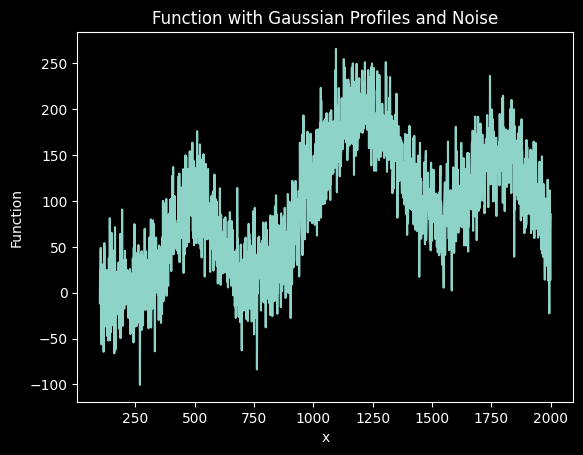

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_function():
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Parameters for the Gaussian profiles
    mean1 = 500
    std1 = 100
    amplitude1 = 100

    mean2 = 1200
    std2 = 200
    amplitude2 = 200

    mean3 = 1800
    std3 = 150
    amplitude3 = 150

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

# Generate the function
x, function = generate_function()

# Plot the function
plt.plot(x, function)
plt.xlabel('x')
plt.ylabel('Function')
plt.title('Function with Gaussian Profiles and Noise')
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def generate_function(mean1, std1, amplitude1, mean2, std2, amplitude2, mean3, std3, amplitude3):
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

# Define sliders for the parameters
mean1_slider = FloatSlider(value=200, min=100, max=2000, step=1, description='Mean 1')
std1_slider = FloatSlider(value=50, min=1, max=500, step=1, description='Std 1')
amplitude1_slider = FloatSlider(value=200, min=1, max=500, step=1, description='Amplitude 1')

mean2_slider = FloatSlider(value=500, min=100, max=2000, step=1, description='Mean 2')
std2_slider = FloatSlider(value=100, min=1, max=500, step=1, description='Std 2')
amplitude2_slider = FloatSlider(value=100, min=1, max=500, step=1, description='Amplitude 2')

mean3_slider = FloatSlider(value=1500, min=100, max=2000, step=1, description='Mean 3')
std3_slider = FloatSlider(value=500, min=1, max=500, step=1, description='Std 3')
amplitude3_slider = FloatSlider(value=400, min=1, max=500, step=1, description='Amplitude 3')

# Update the plot when the sliders change
@interact(mean1=mean1_slider, std1=std1_slider, amplitude1=amplitude1_slider,
        mean2=mean2_slider, std2=std2_slider, amplitude2=amplitude2_slider,
        mean3=mean3_slider, std3=std3_slider, amplitude3=amplitude3_slider)
def update_plot(mean1, std1, amplitude1, mean2, std2, amplitude2, mean3, std3, amplitude3):
    x, function = generate_function(mean1, std1, amplitude1, mean2, std2, amplitude2, mean3, std3, amplitude3)

    # Clear the previous plot
    plt.clf()

    # Plot the updated function
    plt.plot(x, function)
    plt.xlabel('x')
    plt.ylabel('Function')
    plt.title('Function with Gaussian Profiles and Noise')
    plt.show()


interactive(children=(FloatSlider(value=200.0, description='Mean 1', max=2000.0, min=100.0, step=1.0), FloatSl…

In [10]:
def generate_signal(amplitude1, mean1, std1, amplitude2, mean2, std2, amplitude3, mean3, std3):
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

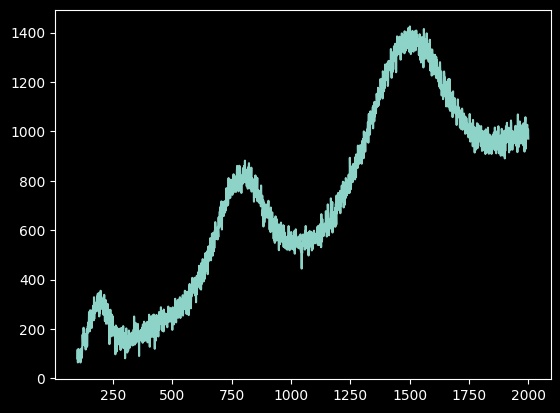

In [1]:
import numpy as np

In [2]:
def generate_signal(amplitude1, mean1, std1, amplitude2, mean2, std2, amplitude3, mean3, std3):
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

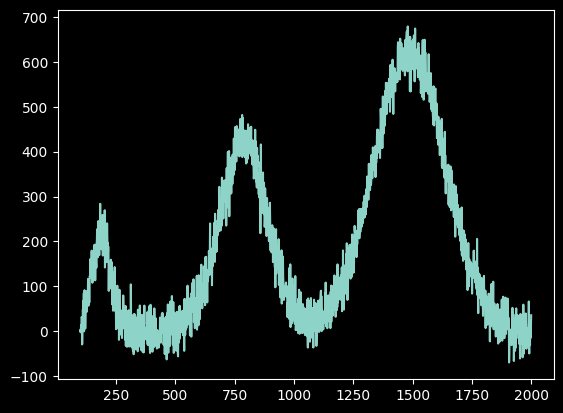

In [5]:
import matplotlib.pyplot as plt

x, y = generate_signal(222, 188, 40, 422, 788, 100, 622, 1488, 150)
z = 0.5*x + y
plt.plot(x, y)

Amplitudes: [217.52414194 423.64862269 622.05377396]
Centers: [ 188.55283801  788.05692801 1487.38756372]
Sigmas: [ 40.14335226  99.54382058 150.23925292]


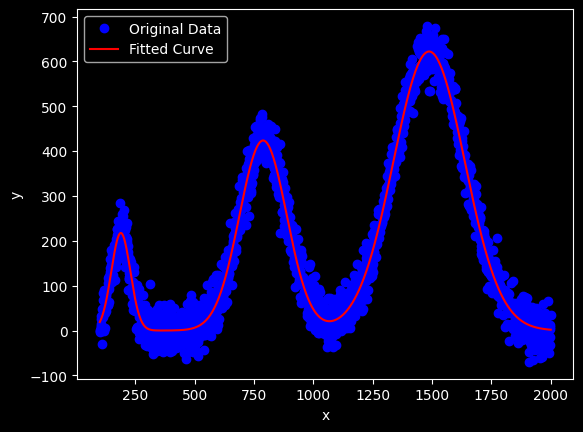

In [6]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function as the sum of three Gaussian curves
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def multi_peak_fit(x, *params):
    num_peaks = len(params) // 3
    y_fit = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude, center, sigma = params[i*3 : (i+1)*3]
        y_fit += gaussian(x, amplitude, center, sigma)
    return y_fit

# Perform the multi-peak fitting
initial_guess = [100, 250, 80, 400, 750, 80, 400, 1500, 80]  # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
popt, pcov = curve_fit(multi_peak_fit, x, y, p0=initial_guess)

# Extract the optimized parameters
amplitudes = popt[0::3]
centers = popt[1::3]
sigmas = popt[2::3]

# Print the results

print('Amplitudes: {}'.format(amplitudes))
print('Centers: {}'.format(centers))
print('Sigmas: {}'.format(sigmas))

# Generate the fitted curve
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = multi_peak_fit(x_fit, *popt)

# Plot the original data and the fitted curve
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1]:
x, y = generate_signal(222, 188, 40, 422, 788, 100, 622, 1488, 150)
z = 0.5*x + y
plt.plot(x, z)

NameError: name 'generate_signal' is not defined

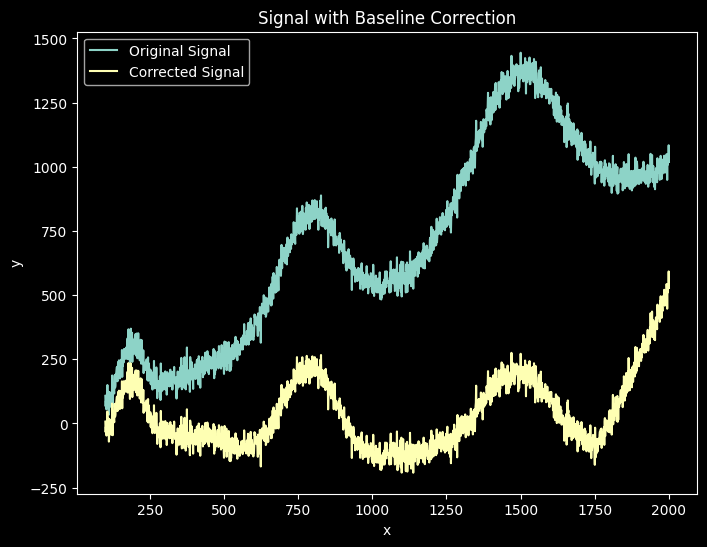

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_baseline(y, window_size=500):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Estimate the baseline
baseline = estimate_baseline(z)

# Correct the signal by subtracting the baseline
corrected_signal = z - baseline

# Plot the original and corrected signals
plt.figure(figsize=(8, 6))
plt.plot(x, z, label='Original Signal')
plt.plot(x, corrected_signal, label='Corrected Signal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Signal with Baseline Correction')
plt.legend()
plt.show()


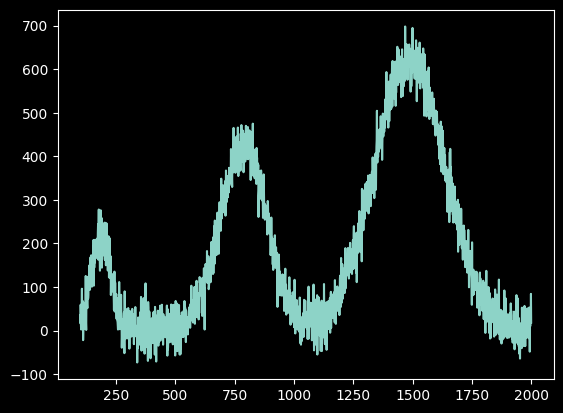

In [16]:
plt.plot(x,y)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os


class RamanSpectrum:
    def __init__(self, filepath):
        # Read in the data from the file
        with open(filepath, 'r', encoding='iso-8859-1') as f:
            lines = f.readlines()
        
        # Extract the metadata from the file
        metadata = {}
        for line in lines:
        
            if line.startswith("#"):
                # Storing the metadata
                key, value = line.strip().split("=")
                metadata[key[1:]] = value.replace('\t', '')
        # Now that we have the metadata stored in a dictionary, we can
        # store the value of the keys in a set of strings

        self.metakeys = metadata.keys()
        
        # Extract the x and y data from the file
        data = np.loadtxt(lines[len(metadata):])
        self.x = data[:,0]
        self.y = data[:,1]
        
        # Store the metadata as object attributes
        self.metadata = metadata
    
    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.show()

path = "../raman_2/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)


['../raman_2//Si_nano_muestra 3_25.txt', '../raman_2//Si_nano_muestra 3_16.txt', '../raman_2//Si_nano_muestra 3_63.txt', '../raman_2//Si_nano_muestra 3_01.txt', '../raman_2//Si_nano_muestra 3_64.txt', '../raman_2//Si_nano_muestra 3_31.txt', '../raman_2//Si_nano_muestra 3_46.txt', '../raman_2//Si_nano_muestra 3_59.txt', '../raman_2//Si_nano_muestra 3_57.txt', '../raman_2//Si_nano_muestra 3_38.txt', '../raman_2//Si_nano_muestra 3_62.txt', '../raman_2//Si_nano_muestra 3_48.txt', '../raman_2//Si_nano_muestra 3_37.txt', '../raman_2//Si_nano_muestra 3_34.txt', '../raman_2//Si_nano_muestra 3_33.txt', '../raman_2//Si_nano_muestra 3_17.txt', '../raman_2//Si_nano_muestra 3_65.txt', '../raman_2//Si_nano_muestra 3_52.txt', '../raman_2//Si_nano_muestra 3_32.txt', '../raman_2//Si_nano_muestra 3_60.txt']


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Create the interactive plot
@interact
def plot_function(function=Dropdown(options=files)):
    ob = RamanSpectrum(function)
    plt.plot(ob.x, ob.y)
    plt.title(function)
    plt.show()

interactive(children=(Dropdown(description='function', options=('../raman_2//Si_nano_muestra 3_25.txt', '../ra…

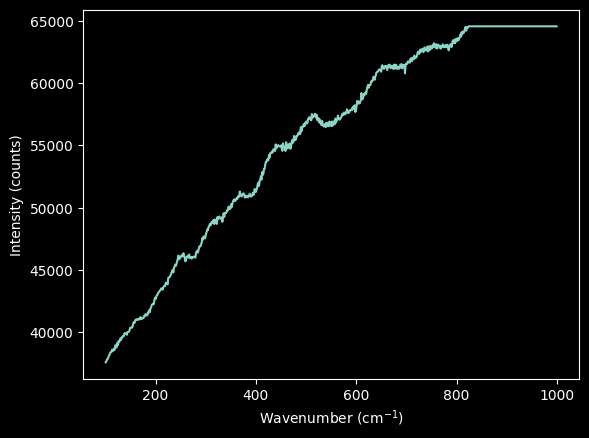

In [22]:
spectrum = RamanSpectrum(files[0])
spectrum.plot()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(y, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline

def plot_signal_with_baseline_correction(window_size):
    # Estimate the baseline
    baseline = estimate_baseline(y, window_size)

    # Correct the signal by subtracting the baseline
    corrected_signal = y - baseline

    # Plot the original and corrected signals
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Original Signal')
    plt.plot(x, corrected_signal, label='Corrected Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Signal with Baseline Correction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Create an interactive slider for window size
window_size_slider = IntSlider(min=1, max=len(x), step=1, value=100, description='Window Size')

# Create the interactive plot
interact(plot_signal_with_baseline_correction, window_size=window_size_slider);


interactive(children=(IntSlider(value=100, description='Window Size', max=1901, min=1), Output()), _dom_classe…

In [ ]:
# Selectin